<a href="https://colab.research.google.com/github/ingcarlosalazar/Analisis-de-datos/blob/main/shanghai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# leer dataset xlsx
df_original = pd.read_excel('/content/drive/My Drive/Articulo Tesis/DataNew/shanghairanking.xlsx', sheet_name='Hoja1')
print(df_original.shape)
df_original.head()

(3002, 12)


,year,world rank,Subject,Sciencies,Institution,score,Q1,PUB,CNCI,IC,TOP,AWARD
0,2017,1,Natural Sciences,Mathematics,Princeton University,349.9,NaN,66.7,71.0,60.9,100.0,100.0
1,2017,2,Natural Sciences,Mathematics,New York University,286.4,NaN,60.0,73.2,69.9,65.0,74.3
2,2017,3,Natural Sciences,Mathematics,Pierre and Marie Curie University - Paris 6,284.0,NaN,100.0,64.5,69.5,73.4,32.2
3,2017,4,Natural Sciences,Mathematics,Massachusetts Institute of Technology (MIT),282.1,NaN,77.7,70.0,61.6,89.9,32.2
4,2017,5,Natural Sciences,Mathematics,University of Paris-Sud (Paris 11),277.9,NaN,69.1,58.5,69.4,62.0,74.3


# Preprocesamiento

## Analizando Datos Nulos

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         3002 non-null   int64  
 1   world rank   3002 non-null   object 
 2   Subject      3002 non-null   object 
 3   Sciencies    3002 non-null   object 
 4   Institution  3002 non-null   object 
 5   score        300 non-null    float64
 6   Q1           1500 non-null   float64
 7   PUB          1502 non-null   float64
 8   CNCI         3002 non-null   float64
 9   IC           3002 non-null   float64
 10  TOP          3002 non-null   float64
 11  AWARD        3002 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 281.6+ KB


In [ ]:
print("Número de registros:", df_original.shape[0], end="\n\n")
(df_original.iloc[:, 5:]==0).sum()

Número de registros: 3002



score       0
Q1          0
PUB         0
CNCI        0
IC          0
TOP      1253
AWARD    2838
dtype: int64

In [ ]:
print("Número de registros:", df_original.shape[0], end="\n\n")
df_original.iloc[:, 5:].isna().sum()

Número de registros: 3002



score    2702
Q1       1502
PUB      1500
CNCI        0
IC          0
TOP         0
AWARD       0
dtype: int64

In [ ]:
#@title Tratamiento de Datos Nulos
df = df_original.dropna(subset="score")

df["Q1_isna"] = df_original.Q1.isna().astype(int, copy=True)
df["PUB_isna"] = df_original.PUB.isna().astype(int, copy=True)

df.Q1.fillna(0, inplace=True)
df.PUB.fillna(0, inplace=True)

print("Número de registros:", df.shape[0], end="\n\n")
print("\tNulos")
print(df.iloc[:, 5:].isna().sum())
print("\n\tCeros")
print((df.iloc[:, 5:]==0).sum(), end="\n\n")

Número de registros: 300

	Nulos
score       0
Q1          0
PUB         0
CNCI        0
IC          0
TOP         0
AWARD       0
Q1_isna     0
PUB_isna    0
dtype: int64

	Ceros
score         0
Q1          150
PUB         150
CNCI          0
IC            0
TOP           4
AWARD       146
Q1_isna     150
PUB_isna    150
dtype: int64



<ipython-input-26-b6892f9b45ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q1_isna"] = df_original.Q1.isna().astype(int, copy=True)
<ipython-input-26-b6892f9b45ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PUB_isna"] = df_original.PUB.isna().astype(int, copy=True)
<ipython-input-26-b6892f9b45ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

## Reset index

In [ ]:
df.reset_index(drop=True, inplace=True)

## Feature Scaling

In [ ]:
print("Columnas:", list(df.iloc[:, 5:].columns))

Columnas: ['score', 'Q1', 'PUB', 'CNCI', 'IC', 'TOP', 'AWARD', 'Q1_isna', 'PUB_isna']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustar y transformar las características
scaled_data = scaler.fit_transform(df.iloc[:, 5:])
df_analisis = pd.DataFrame(scaled_data, columns=df.iloc[:, 5:].columns)
print(f"shape: {df_analisis.shape}")
df_analisis.head()

shape: (300, 9)


,score,Q1,PUB,CNCI,IC,TOP,AWARD,Q1_isna,PUB_isna
0,3.058935,-0.965915,1.275215,-0.172357,-1.272307,2.459514,3.201143,1.0,-1.0
1,1.679059,-0.965915,1.051051,0.066676,-0.118849,0.435318,2.154987,1.0,-1.0
2,1.626906,-0.965915,2.389344,-0.878592,-0.170114,0.921125,0.441245,1.0,-1.0
3,1.585619,-0.965915,1.643246,-0.281009,-1.182593,1.875389,0.441245,1.0,-1.0
4,1.494351,-0.965915,1.355513,-1.530501,-0.182930,0.261815,2.154987,1.0,-1.0


### Probamos matemática del Standard Scaler

In [ ]:
# Obtener la media de las características
media = scaler.mean_

# Obtener la desviación estándar de las características
desviacion_estandar = scaler.scale_

print(f"u: {media}\ns: {desviacion_estandar}")

u: [209.132       30.992       28.58533333  72.58633333  70.82733333
  57.473       21.36033333   0.5          0.5       ]
s: [46.01863437 32.08565208 29.88881482  9.2037409   7.80262688 17.29081561
 24.56612288  0.5         0.5       ]


Fórmula de Standar Scaler
> z = (x - u)/s

- x: input
- u: media, o cero en caso de  `with_std=False`
- s: desviación estandar

Resultado de inferencia a escala normal:
> y = z*s + u

In [ ]:
# Comprobamos las ecuaciones ...
print(f"Columnas: {df.iloc[:,5:].columns.to_list()}")
input_ejemplo = df.iloc[4, 5:].to_numpy()
print("Input de ejemplo: ", input_ejemplo)

z = (input_ejemplo - media)/desviacion_estandar
print("Input escalado:", z)

print("\nRegreso a la escala original")
x = z*desviacion_estandar + media
print("Input devuelta a escala:", x)

Columnas: ['score', 'Q1', 'PUB', 'CNCI', 'IC', 'TOP', 'AWARD', 'Q1_isna', 'PUB_isna']
Input de ejemplo:  [277.9 0.0 69.1 58.5 69.4 62.0 74.3 1 0]
Input escalado: [1.494351167534003 -0.9659146064325688 1.3555126526718246
 -1.53050085680179 -0.18292984598116652 0.2618152956494093
 2.1549866428292415 1.0 -1.0]

Regreso a la escala original
Input devuelta a escala: [277.9 0.0 69.1 58.5 69.4 62.0 74.3 1.0 0.0]


## Exploración y Correlación

In [ ]:
# Cantidad de Registros por Institución

df_contingencia = pd.crosstab([df.Institution], [df.year],
                              rownames=["Instituciones"],
                              colnames=["Años"]
                             )
print("Cantidad de Instituciones: ", df_contingencia.shape[0], end="\n\n")
print("Instituciones con data de 5 años:", (df_contingencia.sum(axis=1)==5).sum())
print("Instituciones con data de 4 años:", (df_contingencia.sum(axis=1)==4).sum())
print("Instituciones con data de 3 años:", (df_contingencia.sum(axis=1)==3).sum())
print("Instituciones con data de 2 años:", (df_contingencia.sum(axis=1)==2).sum())
print("Instituciones con data de 1 año: ", (df_contingencia.sum(axis=1)==1).sum())
print("Instituciones con data de 0 años:", (df_contingencia.sum(axis=1)==0).sum())
print()
print("Instituciones / Data  por año:")
print(df_contingencia.sum(axis=0))
print()
df_contingencia

Cantidad de Instituciones:  76

Instituciones con data de 5 años: 5
Instituciones con data de 4 años: 5
Instituciones con data de 3 años: 14
Instituciones con data de 2 años: 6
Instituciones con data de 1 año:  15
Instituciones con data de 0 años: 0

Instituciones / Data  por año:
Años
2017    50
2018    50
2019    50
2020    50
2021    50
2022    50
dtype: int64



Años,2017,2018,2019,2020,2021,2022
Instituciones,,,,,,
Aix Marseille University,1,0,0,0,0,0
Brown University,1,1,1,1,1,1
California Institute of Technology,1,0,0,1,1,1
Columbia University,1,1,1,1,1,1
ETH Zurich,0,0,0,1,1,1
...,...,...,...,...,...,...
University of Washington,0,1,1,1,1,1
University of Wisconsin - Madison,1,1,1,1,1,1
University of Zurich,0,0,1,1,1,0


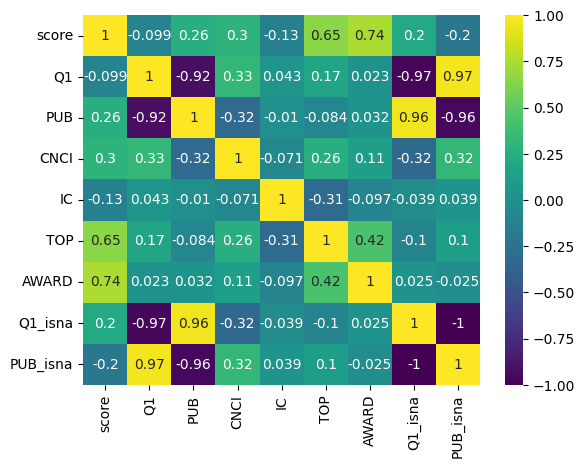

In [ ]:
# Correlaciones

# Obtener la tabla de correlación
corr = df_analisis.corr()

# Graficar la tabla de correlación en un mapa de calor
sns.heatmap(corr, cmap='viridis', annot=True)
plt.show()


<Axes: xlabel='PUB', ylabel='Q1'>

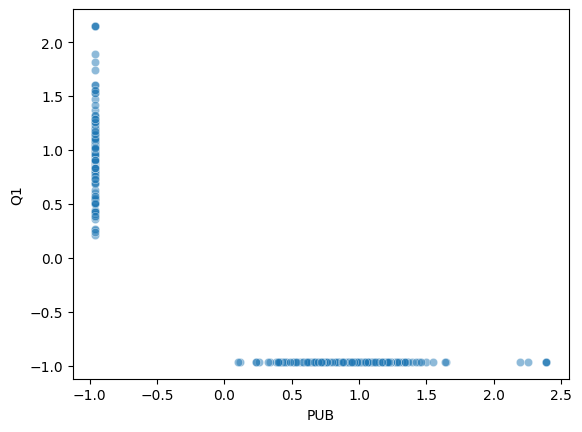

In [ ]:
# scatter plot de las columnas de PUB y Q1
sns.scatterplot(data=df_analisis, x="PUB", y="Q1", alpha=0.5)

Cantidad de ceros: 150


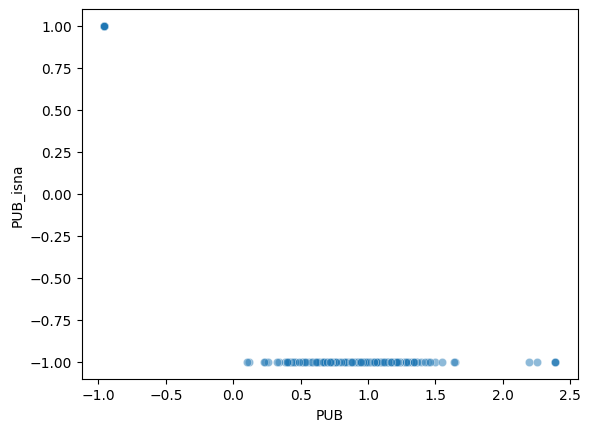

In [ ]:
# scatter plot de las columnas de PUB y Q1
sns.scatterplot(data=df_analisis, x="PUB", y="PUB_isna", alpha=0.5)
print("Cantidad de ceros:", (df.PUB==0).sum())

Cantidad de ceros: 150


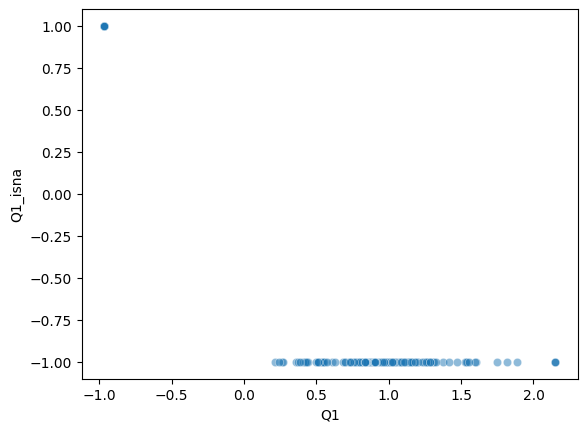

In [ ]:
# scatter plot de las columnas de PUB y Q1
sns.scatterplot(data=df_analisis, x="Q1", y="Q1_isna", alpha=0.5)
print("Cantidad de ceros:", (df.Q1==0).sum())

,score,Q1,PUB,CNCI,IC,TOP,AWARD,Q1_isna
0,3.058935,-0.965915,1.275215,-0.172357,-1.272307,2.459514,3.201143,1.0
1,1.679059,-0.965915,1.051051,0.066676,-0.118849,0.435318,2.154987,1.0
2,1.626906,-0.965915,2.389344,-0.878592,-0.170114,0.921125,0.441245,1.0


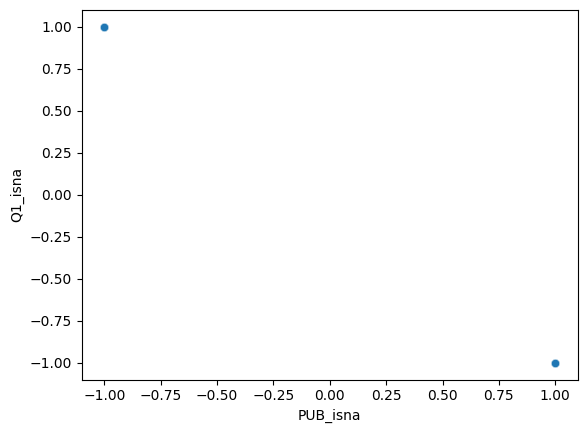

In [ ]:
# scatter plot de las columnas de PUB y Q1
sns.scatterplot(data=df_analisis, x="PUB_isna", y="Q1_isna", alpha=0.5)

# Cuando Q1 es nulo, PUB no y viceversa
# debido a esto, simplemente sería necesario uno de los dos
df_analisis.drop(columns=["PUB_isna"], inplace=True)
df_analisis.head(3)

<Axes: xlabel='TOP', ylabel='score'>

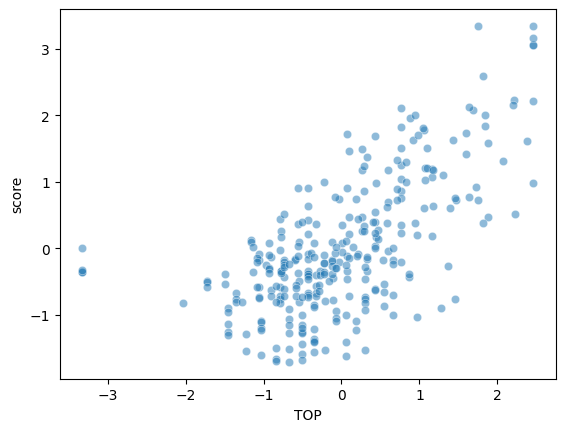

In [ ]:
# scatter plot de las columnas de PUB y Q1
sns.scatterplot(data=df_analisis, x="TOP", y="score", alpha=0.5)

Cantidad de ceros: 146


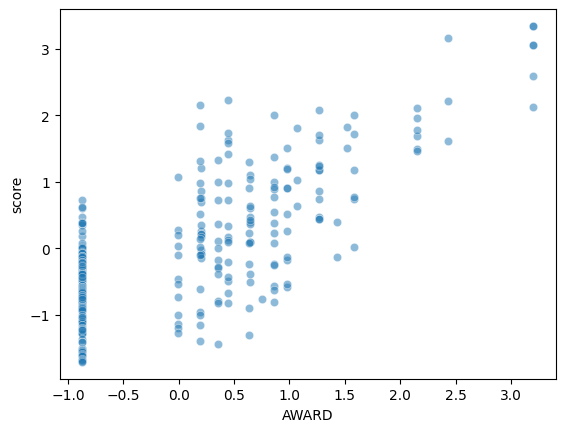

In [ ]:
sns.scatterplot(data=df_analisis, x="AWARD", y="score", alpha=0.5)
print("Cantidad de ceros:", (df.AWARD==0).sum())

# Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_analisis.iloc[:, 1:]  # características
y = df_analisis.score                 # target

# Dividir los datos en conjuntos de entrenamiento y prueba
# test_size es la proporción del conjunto de datos a incluir en el conjunto de prueba
# random_state es una semilla para la generación de números aleatorios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Q1,PUB,CNCI,IC,TOP,AWARD,Q1_isna
232,1.228213,-0.956389,-0.215818,1.021793,-0.669315,-0.869504,-1.0
59,-0.965915,1.295289,-0.563503,-1.169777,0.764973,0.201076,1.0
6,-0.965915,1.211646,-1.019839,0.445064,0.603037,1.267586,1.0
185,1.131596,-0.956389,0.055811,0.957712,-0.738716,-0.869504,-1.0
173,0.785647,-0.956389,-0.585233,-1.438917,0.464235,-0.002456,-1.0
...,...,...,...,...,...,...,...
188,1.084846,-0.956389,-0.520042,-1.362020,-0.229775,-0.869504,-1.0
71,-0.965915,0.425399,-1.530501,0.880814,-0.906435,0.982640,1.0
106,-0.965915,1.459230,1.500875,-0.721210,1.592001,0.441245,1.0
270,0.555014,-0.956389,0.696854,-0.516151,0.308083,0.359832,-1.0


# Regresión Múltiple

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Crear el modelo de regresión lineal
model_lineal = LinearRegression()

# Entrenar el modelo
model_lineal.fit(X_train, y_train)

LinearRegression()

## Evaluación

In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred = model_lineal.predict(X_test)

In [ ]:
# Calcular el error absoluto porcentaje medio (MAE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular el coeficiente de determinación (R²)
r_squared = r2_score(y_test, y_pred)

print("Error Absoluto Porcentaje Medio (MAPE):", mape)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R²):", r_squared)

Error Absoluto Porcentaje Medio (MAPE): 0.6061479588331734
Raíz del Error Cuadrático Medio (RMSE): 0.3464191158619725
Coeficiente de Determinación (R²): 0.8701365692166709


In [ ]:
model_lineal.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

<Axes: >

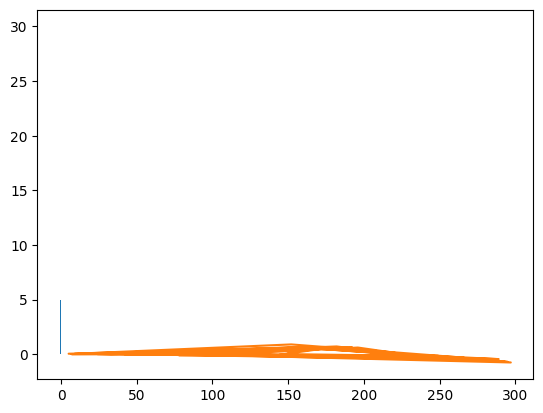

In [ ]:
# prompt: Obten los residuales del model_lineal

residuales = y_test - y_pred
residuales.hist()
residuales.plot()


Text(0.5, 1.0, 'Gráfico de Residuales')

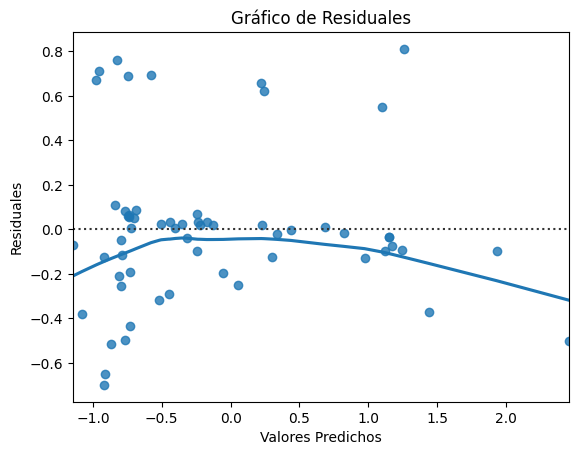

In [ ]:
# prompt: quiero realizar una grafica para analizar los residuales de moldel_lineal

residuales = y_test - y_pred
#residuales.hist()
#residuales.plot()
sns.residplot(x=y_pred, y=residuales, lowess=True)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')


Métricas para regresiones lineales:
  - https://vitalflux.com/mse-vs-rmse-vs-mae-vs-mape-vs-r-squared-when-to-use/
  - https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/

<br>

Resumen y comparación:

R² (Coeficiente de Determinación):

  - Escala: Varía de 0 a 1.
  - Interpretación:
    - Cerca de 1: Indica que el modelo explica una gran proporción de la varianza en la variable dependiente. Es un indicador de un buen modelo.
    - Cerca de 0: Sugiere que el modelo no explica bien la variabilidad de los datos. Es un indicador de un modelo pobre.
    - Valores intermedios: Indican un ajuste moderado del modelo a los datos.

RMSE (Raíz del Error Cuadrático Medio) y MSE (Error Cuadrático Medio):
  - Escala: Varía de 0 a infinito.
  - Interpretación:
    - Cerca de 0: Indica un buen modelo con pequeños errores en las predicciones.
    - Valores altos: Sugieren un modelo con grandes errores en las predicciones.
    - RMSE es más interpretable ya que está en las mismas unidades que la variable de respuesta.

MAE (Error Absoluto Medio):

  - Escala: Varía de 0 a infinito.
  - Interpretación:
    - Cerca de 0: Indica que las predicciones son muy precisas.
    - Valores altos: Indican imprecisión en las predicciones.
    - MAE es robusto a outliers y proporciona una medida directa del error medio.

MAPE (Error Porcentual Absoluto Medio):
  - Escala: Generalmente expresada en porcentajes, varía de 0% a ∞%.
  - Interpretación:
    - Valor bajo (cercano a 0%): Indica un buen modelo, con errores pequeños en relación al valor real.
    - Valor alto: Indica un mal modelo, con grandes errores porcentuales.


## Pesos

In [ ]:
# Pesos del model_lineal
coeficientes = model_lineal.coef_
bias = model_lineal.intercept_
print(f"""
coeficientes: {list(coeficientes)}
bias:         {bias}
""")



coeficientes: [0.5819493790246265, 0.664789496425622, 0.24025999296428838, 0.030236658816563934, 0.35345029243225445, 0.5229477167556781, 0.2304061279551553]
bias:         0.0009640229656552694



## Validar modelo matemático

In [ ]:
# Obtener la media de las características
u = scaler.mean_[1:-1]
u_score = scaler.mean_[0]

# Obtener la desviación estándar de las características
s = scaler.scale_[1:-1]
s_score = scaler.scale_[0]

# Selección del registro a analizar para la comparación
i=0
index = X_test.iloc[[i],:].index[0]

print(f"Columnas analizadas:             {X_test.columns.to_list()}\n")

# Inputs del modelo
input_scaled = X_test.iloc[[i],:].to_numpy()
input_noscaled = X_test.iloc[[i],:].to_numpy()[0]*s+u
print(f"Valores de entrada NO escalados: {input_noscaled.tolist()}")
print(f"Valores de entrada escalados:    {input_scaled[0].tolist()}")

# Salidas
print("\n\tValores reescalados para ser interpretables...")
salida_true = y_test.iloc[i]
print(f"Valor de Salida (true):                     {salida_true*s_score+u_score}")

salida_pred = model_lineal.predict(input_scaled)[0]
print(f"Valor de Salida (prediction):               {salida_pred*s_score+u_score}")

salida_con_coeficientes = np.array([input_scaled[0,j]*coeficientes[j] for j in range(7)]).sum()+bias
print(f"Valor de Salida (calculada con matemática): {salida_con_coeficientes*s_score+u_score}")

Columnas analizadas:             ['Q1', 'PUB', 'CNCI', 'IC', 'TOP', 'AWARD', 'Q1_isna']

Valores de entrada NO escalados: [64.5, 0.0, 88.7, 79.7, 77.8, 60.3, 0.0]
Valores de entrada escalados:    [1.0443297183899887, -0.9563889870542769, 1.750773608430281, 1.1371384026918905, 1.1755952097781168, 1.585096144848344, -1.0]

	Valores reescalados para ser interpretables...
Valor de Salida (true):                     262.9
Valor de Salida (prediction):               275.48942459234144
Valor de Salida (calculada con matemática): 275.48942459234144


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df.iloc[[index],5:-1]

,score,Q1,PUB,CNCI,IC,TOP,AWARD,Q1_isna
203,262.9,64.5,0.0,88.7,79.7,77.8,60.3,0


# Red Neuronal - MLP

In [ ]:
!pip install keras-tuner # Librería para el Hyperparameter tunning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import keras
from keras import layers, models, callbacks
from keras.layers import Layer
from tensorflow.keras import optimizers, losses, backend as K

from keras_tuner import HyperModel
from keras_tuner.tuners import Hyperband

In [ ]:
# Configuration to active custom loss function
# https://stackoverflow.com/questions/66287143/keras-loss-functionfrom-keras-input
'''
En el tf 2.0, el `eager mode` está activado de forma predeterminada.
No es posible obtener esta funcionalidad en modo entusiasta ya que el ejemplo anterior está escrito actualmente.
Creo que hay formas de hacerlo en modo ansioso con una programación más avanzada.
Pero de lo contrario, es una cuestión simple de desactivar el `eager mode` y ejecutarlo en `graph mode` con:
'''
# [eager execution vs graph](https://jonathan-hui.medium.com/tensorflow-eager-execution-v-s-graph-tf-function-6edaa870b1f1)

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
# Al hacer esto no podremos guardar los modelos como .keras, quedándonos
# solo la opción de guardarlos como .h5

In [ ]:
#@title Inicialización de directorios para este proyecto
import os

directory = '/content/drive/My Drive/Trabajo Tesis UG/shanghai'
folder_history = directory+'/historicos_MLP'
folder_models = directory+'/modelos_MLP'

# Crear directorios para guardar históricos y modelos
os.makedirs(folder_history, exist_ok=True)
os.makedirs(folder_models, exist_ok=True)

## Crear modelos

In [ ]:
# ---------------- Custom Loss Function ----------------
class RMSELoss(losses.Loss):
    # Cuando guardemos y luego carguemos un modelo usando el scope
    # va a solicitar que el constructor haga uso de 'reduction' y 'name'
    # Integrarlas permite que tu función de pérdida personalizada se comporte
    # de manera similar a las funciones de pérdida integradas en Keras
    def __init__(self, reduction=losses.Reduction.AUTO, name='RMSELoss'):
        '''
         Cuando entrenas un modelo con lotes de datos, cada ejemplo en el lote
         tiene su propia pérdida. El parámetro reduction define cómo estas
         pérdidas individuales deben combinarse (reducirse) para formar
         una única pérdida que el algoritmo de optimización puede utilizar
         para actualizar los pesos del modelo.
         En este caso AUTO da la orden de calcular el promedio del loss por lote.
        '''
        super(RMSELoss, self).__init__(reduction=reduction)

    # adds the custom loss to the class
    def call(self, y_true, y_pred):
        loss = K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
        #tf.print("este es el loss:", loss)
        #tf.print(type(loss))
        return loss

# ---------------------- Métricas ----------------------
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))


tf.keras.utils.get_custom_objects().update({'RMSELoss': RMSELoss})
tf.keras.utils.get_custom_objects().update({'rmse': rmse})
tf.keras.utils.get_custom_objects().update({'r_squared': r_squared})


In [ ]:
# Configuración de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1],
    'optimizer': [optimizers.legacy.SGD, optimizers.legacy.Adam, optimizers.legacy.RMSprop, optimizers.legacy.Nadam], # , 'adadelta', 'adagrad', 'adamax'
    'batch_size': [8, 10, 12, 15, 18, 20],
    'num_layers': [1, 4],         # Debe generar todas las combinaciones posibles aquí
    'neurons_per_layer': [3, 14]  # Debe generar todas las combinaciones posibles aquí
}

param_grid['optimizer_name'] = [optimizer.__name__ for optimizer in param_grid['optimizer']]


In [ ]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        # Primera capa oculta
        model.add(layers.Dense(units=hp.Int('units_input',
                                            min_value=param_grid['neurons_per_layer'][0],
                                            max_value=param_grid['neurons_per_layer'][1],
                                            step=1
                                            ), activation='linear', input_dim=7))
        # Se agregan más capas ocultas acorde se vaya iterando
        for i in range(hp.Int('num_layers', param_grid['num_layers'][0], param_grid['num_layers'][1])):
            model.add(layers.Dense(units=hp.Int(f'units_{i}',
                                                min_value=param_grid['neurons_per_layer'][0],
                                                max_value=param_grid['neurons_per_layer'][1],
                                                step=1
                                                ), activation='linear'))

        model.add(layers.Dense(1, activation='linear')) # Capa de salida

        # Elige el optimizador
        index_optimizer = values=param_grid['optimizer_name'].index(hp.Choice('optimizer', values=param_grid['optimizer_name'])) # Obtiene el íntice del obtimizador
        optimizer = values=param_grid['optimizer'][index_optimizer]
        model.compile(
            optimizer=optimizer(learning_rate=hp.Choice('learning_rate', values=param_grid['learning_rate'])), # Le asigna un learning_rate al optimizador
            loss=RMSELoss(), # Nuestra Custom Loss Function
            metrics=['mape', rmse, r_squared]
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        early_stopping = callbacks.EarlyStopping(
            # early stopping ayuda a que un modelo no se entrene demasiado y gaste recursos de más
            monitor='val_loss', # Se detiene dependiendo del valor de la función de pérdida del set de validación
            patience=5 # El entrenamiento se detiene en caso de que en 5 iteraciones el modelo no mejore
            )

        # Agrega a los argumentos kwargs el callback de early stopping
        # Es necesario este bloque porque sino salta el error:
        '''
        TypeError: keras.src.engine.training_v1.Model.fit() got multiple values for keyword argument 'callbacks'
        '''
        # Este error salta al momento del entrenamiento
        if 'callbacks' in kwargs:
            kwargs['callbacks'].append(early_stopping)
        else:
            kwargs['callbacks'] = [early_stopping]

        return model.fit(*args, **kwargs) # Entrenamiento

# Inicializando el Tunner
hypermodel = None
hypermodel = MyHyperModel()

tuner= None
tuner = Hyperband(
    hypermodel,
    objective='val_loss',
    max_epochs=100,  # max_epochs igualado a 100
    factor=9, # Profundidad de búsqueda
    directory=directory,
    project_name='MLP_keras_hyperband',
    seed=42
)


In [ ]:
# Entrenamiento
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test)
             )

Trial 146 Complete [00h 00m 03s]
val_loss: 0.3269864896933238

Best val_loss So Far: 0.202776696284612
Total elapsed time: 00h 06m 01s


  1. Un csv que guarde el nombre del archivo del siguiente doc explicado y los valores de las métricas seleccionadas (asuma que fueron: ['mape', rmes, r_squared]). Adicional agrega las configuraciones seleccionadas para la creación de este modelo.
  2. Guarda de cada modelo, un histórico de los valores de sus métricas en csv, el nombre de estos archivos está en el csv del item 1. Estos archivos guárdalos en la carpeta "historicos".
  3. Guarda por cada modelo, su archivo h5 correspondiente en la carpeta "modelos".
Adicional, en la misma carpeta donde se encuentra nuestro archivo python, guarda también el modelo h5 categorizado como el mejor de todos.

In [ ]:
from tqdm import tqdm
import warnings
import time


# Suprimir la advertencia que sale por usar formato .h5 y no .keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')
# Suprimir la advertencia por load_model
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.iter
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

# Crear directorios para guardar históricos y modelos
os.makedirs(folder_history, exist_ok=True)
os.makedirs(folder_models, exist_ok=True)

# DataFrame para guardar los resultados
results_df = pd.DataFrame()

# Barra de progreso para el proceso de recuperación
num_trials = 50
progress_bar = tqdm(total=num_trials, desc='Processing Trials')

#try:
for trial in tuner.oracle.get_best_trials(num_trials=num_trials):
    trial_id = trial.trial_id

    # El modelo ya está cargado con los parámetros y pesos óptimos (según la conf de esta iteración)
    model = tuner.hypermodel.build(trial.hyperparameters)  # con tuner.load model habían características que no cargaban correctamente
    model_name = f'modelo_{trial_id}'
    model_filename = f'{folder_models}/{model_name}.h5'
    model.save(model_filename) # GUARDAR modelo

    hist_df = pd.DataFrame()
    # Obtener el histórico para cada métrica y añadirlo al DataFrame
    for metric in ['mape', 'rmse', 'r_squared']:
        metric_history_val = trial.metrics.get_history('val_' + metric)
        metric_history_train = trial.metrics.get_history(metric)

        for i, (m_train, m_val) in enumerate(zip(metric_history_train, metric_history_val)):
            hist_df.at[i, 'epoch'] = m_train.step
            hist_df.at[i, f'train_{metric}'] = m_train.value
            hist_df.at[i, f'val_{metric}'] = m_val.value

    hist_filename = f'{folder_history}/{model_name}.csv'
    hist_df.to_csv(hist_filename) # GUARDAR history del modelo

    results_df = pd.concat([
        results_df,
        pd.DataFrame([{
            'trial_id': trial_id,
            'model_name': model_name,
            'mape': trial.metrics.get_best_value('mape'),
            'rmse': trial.metrics.get_best_value('rmse'),
            'r_squared': trial.metrics.get_best_value('r_squared'),
            **trial.hyperparameters.values
            }])
        ], ignore_index=True)

    progress_bar.update(1)

progress_bar.close()
#except Exception as e:
#    print(f'\n\nError occurred on line {e.__traceback__.tb_lineno}: {e}')


progress_bar.close()
# GUARDAR resumen de métricas de los diferentes modelos probados
results_df.to_csv(directory+'/resultadosMLP_modelos_shanghai.csv', index=False)
print(results_df.shape)

Processing Trials: 100%|██████████| 50/50 [00:47<00:00,  1.06it/s]

(50, 18)


In [ ]:
#@title Save BEST model
best_trial = None
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
#best_model = tuner.load_model(best_trial)
best_model_name = f'MLPmejor_modelo_{best_trial.trial_id}'

best_model = tuner.hypermodel.build(best_trial.hyperparameters)  # con tuner.load_model habían características que no cargaban correctamente
best_model.save(f'{directory}/{best_model_name}.h5') # GUARDAR modelo
# Lo mejor sería guardarlo en formato .keras
# pero como no se tiene el "eager execution" habilitado, no podemos utilizar ese formato

print(f"Trial del mejor modelo: {best_trial}")
print(f'\nCompile config:\n{best_model.get_config()}\n')
best_model.summary()

Trial del mejor modelo: <keras_tuner.src.engine.trial.Trial object at 0x7b75e772e470>

Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 7), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_211_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_211', 'trainable': True, 'batch_input_shape': (None, 7), 'dtype': 'float32', 'units': 10, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape'

In [ ]:
#@title Load BEST model
from tensorflow.keras.utils import custom_object_scope

# Como nuestros modelos usan funciones personalizadas, necesitamos añadir al scope
# dichas funciones y objetos, de lo contrario no podremos cargar ningún modelo
''' Con esto evitamos el siguiente error:
ValueError: Unknown loss function: 'RMSELoss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
'''
with custom_object_scope({'RMSELoss': RMSELoss,
                          'rmse':rmse,
                          'r_squared':r_squared
                          }):
    #loaded_modelMLP = models.load_model(f'{directory}/MLPmejor_modelo_{best_trial.trial_id}.h5')
    loaded_modelMLP = models.load_model(f'{directory}/MLPmejor_modelo_0120.h5') # Ingreso manual del nombre del modelo
    #loaded_modelMLP = models.load_model(f'{folder_models}/modelo_0051.h5')
print(f'\nCompile config:\n{loaded_modelMLP.get_config()}\n')
loaded_modelMLP.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 7), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_211_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_211', 'trainable': True, 'batch_input_shape': (None, 7), 'dtype': 'float32', 'units': 10, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'd

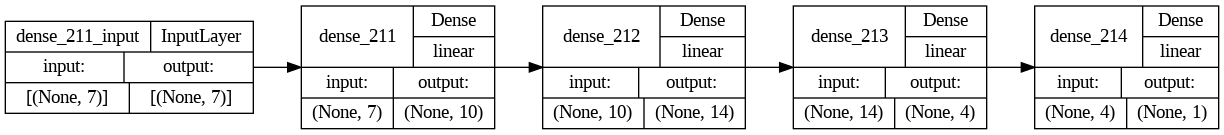

In [ ]:
#@title Imagen de la red del modelo
path_img_file = directory+"/image_redMLP.jpg"
tf.keras.utils.plot_model(loaded_modelMLP,
                          #to_file=path_img_file,
                          #dpi=96, # Determina el tamaño de la imagen y por ende, su calidad, por defecto en 96
                          rankdir='LR', # LR para horizontal. TR para vertical
                          #expand_nested=False,
                          #show_trainable=True,
                          show_shapes=True,
                          show_layer_names=True,
                          show_layer_activations=True
                          )

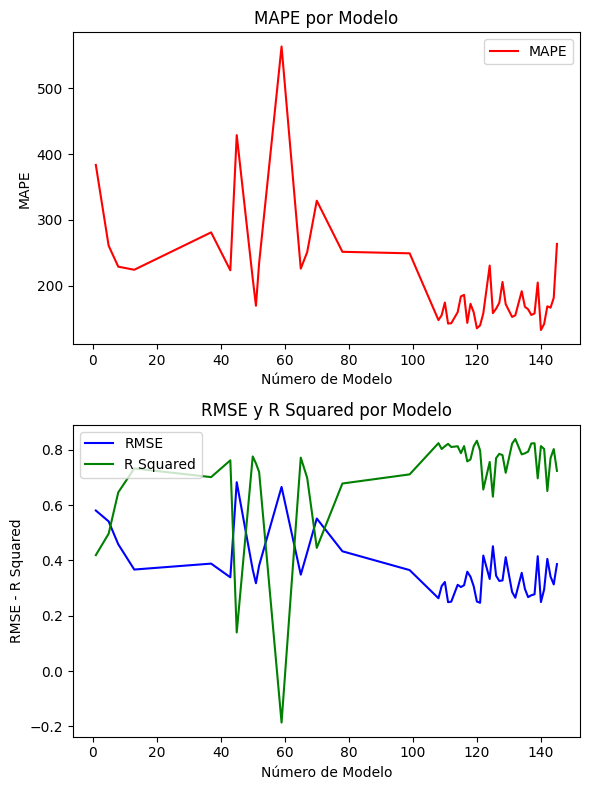

Modelo con el MAPE más bajo ->             value: 132.20196533203125 ;    model: modelo_0140
Modelo con el RMSE más bajo ->             value: 0.2470054030418396 ;    model: modelo_0121
Modelo con el R Squared más cercano a 1 -> value: 0.8390132188796997 ;    model: modelo_0132


In [ ]:
#@title Comparativa de métricas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos
df = pd.read_csv(directory+'/resultadosMLP_modelos_shanghai.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Primer gráfico para 'mape'
sns.lineplot(data=df, x='trial_id', y='mape', color='red', label='MAPE', ax=ax1)
ax1.set_title('MAPE por Modelo')
ax1.set_xlabel('Número de Modelo')
ax1.set_ylabel('MAPE')

# Segundo gráfico para 'rmse' y 'r_squared'
sns.lineplot(data=df, x='trial_id', y='rmse', color='blue', label='RMSE', ax=ax2)
sns.lineplot(data=df, x='trial_id', y='r_squared', color='green', label='R Squared', ax=ax2)
ax2.set_title('RMSE y R Squared por Modelo')
ax2.set_xlabel('Número de Modelo')
ax2.set_ylabel('RMSE - R Squared')
ax2.legend(loc='upper left')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Encontrar los modelos con los mejores valores
best_mape_model, mape_bestvalue = df.iloc[df['mape'].idxmin()]['model_name'], df.iloc[df['mape'].idxmin()]['mape']
best_rmse_model, rmse_bestvalue = df.iloc[df['rmse'].idxmin()]['model_name'], df.iloc[df['rmse'].idxmin()]['rmse']
best_rsquared_model, rsquared_bestvalue = df.iloc[(df['r_squared']-1).abs().idxmin()]['model_name'], df.iloc[(df['r_squared']-1).abs().idxmin()]['r_squared']

print(f"Modelo con el MAPE más bajo ->             value: {mape_bestvalue} ;    model: {best_mape_model}")
print(f"Modelo con el RMSE más bajo ->             value: {rmse_bestvalue} ;    model: {best_rmse_model}")
print(f"Modelo con el R Squared más cercano a 1 -> value: {rsquared_bestvalue} ;    model: {best_rsquared_model}")


In [ ]:
loss, mape, rmse_value, r_squared_value = loaded_modelMLP.evaluate(X_test, y_test)
print(f"""Loss
RMSE Loss: {loss}

Métricas del modelo
MAPE: {mape}
RMSE: {rmse_value}
R2:   {r_squared_value}
""")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Loss
RMSE Loss: 0.963310158252716

Métricas del modelo
MAPE: 182.42164611816406
RMSE: 0.9633101224899292
R2:   -0.8345014452934265



## Pesos

In [ ]:
loaded_modelMLP.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 10)                80        
                                                                 
 dense_212 (Dense)           (None, 14)                154       
                                                                 
 dense_213 (Dense)           (None, 4)                 60        
                                                                 
 dense_214 (Dense)           (None, 1)                 5         
                                                                 
Total params: 299 (1.17 KB)
Trainable params: 299 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weights_MLPmodel = loaded_modelMLP.get_weights()
weights_MLPmodel

[array([[-0.52283114,  0.04235542, -0.08313197, -0.188763  ,  0.10719407,
          0.2522086 ,  0.23982316, -0.3223078 , -0.2503093 ,  0.03730124],
        [ 0.38825548,  0.20309597, -0.17281285, -0.11593759,  0.41944897,
          0.5724108 ,  0.45011258,  0.09663153,  0.22664028,  0.06077421],
        [-0.22565755, -0.3367765 ,  0.42741477, -0.11705941, -0.4609449 ,
          0.3459087 , -0.27267835,  0.16598713, -0.5403161 ,  0.4208665 ],
        [-0.33820805,  0.34341186,  0.5561199 ,  0.21369648, -0.0275414 ,
          0.1910516 , -0.14449626, -0.04007542,  0.15760976,  0.47736192],
        [-0.20514512,  0.5704417 , -0.0575009 , -0.2165334 ,  0.24551952,
         -0.5264828 , -0.21751457, -0.10148531,  0.4214244 ,  0.10563385],
        [ 0.08510375, -0.4225536 ,  0.377608  ,  0.20535237,  0.38945067,
          0.11604142, -0.01321387, -0.0578019 , -0.5254555 ,  0.27035713],
        [-0.5690127 ,  0.50290453,  0.104303  ,  0.11615896,  0.49344516,
         -0.23014703, -0.5678137

In [ ]:
weights_capa1_MLP = weights_MLPmodel[0] # Cada fila son los pesos de una neurona diferente
bias_capa1_MLP = weights_MLPmodel[1]
weights_capa2_MLP = weights_MLPmodel[2]
bias_capa2_MLP = weights_MLPmodel[3]
weights_capa3_MLP = weights_MLPmodel[4]
bias_capa3_MLP = weights_MLPmodel[5]
weights_capaSalida_MLP = weights_MLPmodel[6]
bias_capaSalida_MLP = weights_MLPmodel[7]

print(f"Pesos CAPA1:\n{weights_capa1_MLP}")
print(f"\nBias  CAPA1:\n{bias_capa1_MLP}")
print(f"\n\nPesos CAPA2:\n{weights_capa2_MLP}")
print(f"\nBias  CAPA2:\n{bias_capa2_MLP}")
print(f"\n\nPesos CAPA3:\n{weights_capa3_MLP}")
print(f"\nBias  CAPA3:\n{bias_capa3_MLP}")
print(f"\n\nPesos capa de salida:\n{weights_capaSalida_MLP}")
print(f"\nBias capa de salida:\n{bias_capaSalida_MLP}")

Pesos CAPA1:
[[-0.52283114  0.04235542 -0.08313197 -0.188763    0.10719407  0.2522086
   0.23982316 -0.3223078  -0.2503093   0.03730124]
 [ 0.38825548  0.20309597 -0.17281285 -0.11593759  0.41944897  0.5724108
   0.45011258  0.09663153  0.22664028  0.06077421]
 [-0.22565755 -0.3367765   0.42741477 -0.11705941 -0.4609449   0.3459087
  -0.27267835  0.16598713 -0.5403161   0.4208665 ]
 [-0.33820805  0.34341186  0.5561199   0.21369648 -0.0275414   0.1910516
  -0.14449626 -0.04007542  0.15760976  0.47736192]
 [-0.20514512  0.5704417  -0.0575009  -0.2165334   0.24551952 -0.5264828
  -0.21751457 -0.10148531  0.4214244   0.10563385]
 [ 0.08510375 -0.4225536   0.377608    0.20535237  0.38945067  0.11604142
  -0.01321387 -0.0578019  -0.5254555   0.27035713]
 [-0.5690127   0.50290453  0.104303    0.11615896  0.49344516 -0.23014703
  -0.56781375  0.09720945 -0.5256716  -0.42090064]]

Bias  CAPA1:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Pesos CAPA2:
[[ 0.27146792  0.0034852  -0.05701709 -0.2826959  -0.32

## Validación

In [ ]:
early_stopping = callbacks.EarlyStopping(
            # early stopping ayuda a que un modelo no se entrene demasiado y gaste recursos de más
            monitor='val_loss', # Se detiene dependiendo del valor de la función de pérdida del set de validación
            patience=5 # El entrenamiento se detiene en caso de que en 5 iteraciones el modelo no mejore
            )

historial_MLP = loaded_modelMLP.fit(X_train,
                                    y_train,
                                    validation_data=(X_train,y_train),
                                    epochs=100,
                                    callbacks = [early_stopping]
                                    )

Train on 240 samples, validate on 240 samples
Epoch 1/100
240/240 [==============================] - 0s 495us/sample - loss: 0.5925 - mean_absolute_percentage_error: 369.0372 - rmse: 0.5925 - r_squared: 0.3817 - val_loss: 0.4492 - val_mean_absolute_percentage_error: 301.8859 - val_rmse: 0.4492 - val_r_squared: 0.6183
Epoch 2/100
240/240 [==============================] - 0s 165us/sample - loss: 0.4098 - mean_absolute_percentage_error: 309.1304 - rmse: 0.4098 - r_squared: 0.6910 - val_loss: 0.3371 - val_mean_absolute_percentage_error: 210.9405 - val_rmse: 0.3371 - val_r_squared: 0.7662
Epoch 3/100
240/240 [==============================] - 0s 114us/sample - loss: 0.3554 - mean_absolute_percentage_error: 225.1288 - rmse: 0.3554 - r_squared: 0.7645 - val_loss: 0.3411 - val_mean_absolute_percentage_error: 184.7091 - val_rmse: 0.3411 - val_r_squared: 0.7863
Epoch 4/100
240/240 [==============================] - 0s 121us/sample - loss: 0.2967 - mean_absolute_percentage_error: 177.0273 - rmse

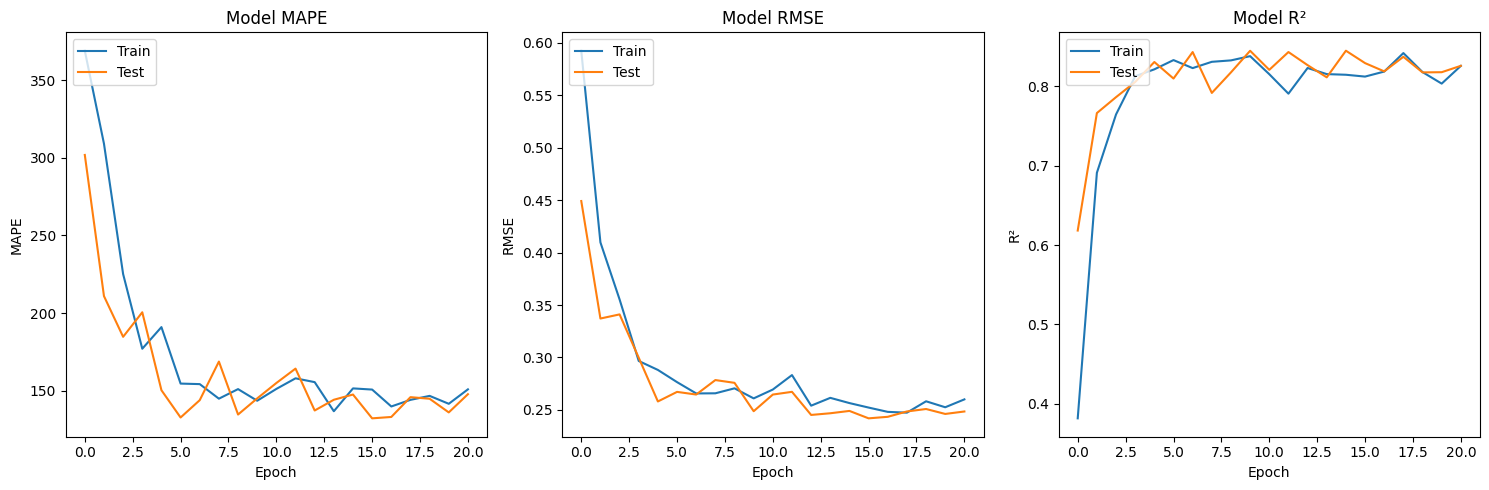

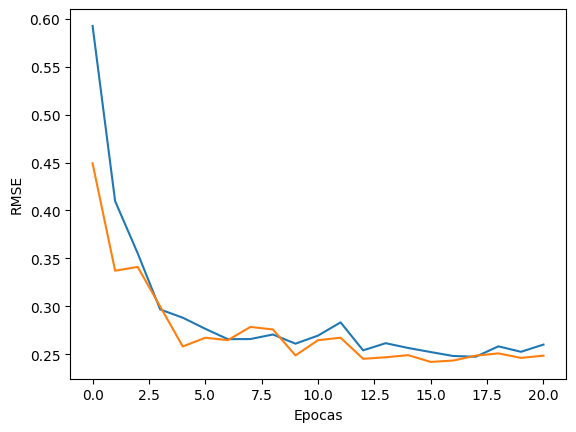

In [ ]:
#Evaluacion del modelo 1
loss, mape, rmse_value, r_squared_value = loaded_modelMLP.evaluate(X_test, y_test)

# Configurar el layout del subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas, tamaño total del plot

# Graficar MAPE
axs[0].plot(historial_MLP.history['mean_absolute_percentage_error'])
axs[0].plot(historial_MLP.history['val_mean_absolute_percentage_error'])
axs[0].set_title('Model MAPE')
axs[0].set_ylabel('MAPE')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Graficar RMSE
axs[1].plot(historial_MLP.history['rmse'])
axs[1].plot(historial_MLP.history['val_rmse'])
axs[1].set_title('Model RMSE')
axs[1].set_ylabel('RMSE')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Graficar R²
axs[2].plot(historial_MLP.history['r_squared'])
axs[2].plot(historial_MLP.history['val_r_squared'])
axs[2].set_title('Model R²')
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Epoch')
axs[2].legend(['Train', 'Test'], loc='upper left')

# Mostrar el plot
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
plt.xlabel("Epocas")
plt.ylabel("RMSE")
plt.plot(historial_MLP.history['loss'], label="loss")
plt.plot(historial_MLP.history['val_loss'], label="val_loss")
plt.show()

**ANTES del Re-entrenamiento**

Loss

RMSE Loss: 0.963310158252716

<br>

Métricas del modelo
- MAPE: 182.42164611816406
- RMSE: 0.9633101224899292
- R2:   -0.8345014452934265


In [ ]:
print(f"""\tDespués del Re-entrenamiento
Loss
RMSE Loss: {loss}

Métricas del modelo
MAPE: {mape}
RMSE: {rmse_value}
R2:   {r_squared_value}
""")

	Después del Re-entrenamiento
Loss
RMSE Loss: 0.2245734135309855

Métricas del modelo
MAPE: 63.00639724731445
RMSE: 0.22457341849803925
R2:   0.8392380475997925



### Pesos luego del re-entrenamiento

In [ ]:
loaded_modelMLP.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 10)                80        
                                                                 
 dense_212 (Dense)           (None, 14)                154       
                                                                 
 dense_213 (Dense)           (None, 4)                 60        
                                                                 
 dense_214 (Dense)           (None, 1)                 5         
                                                                 
Total params: 299 (1.17 KB)
Trainable params: 299 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weights_MLPmodel_retrained = loaded_modelMLP.get_weights()
weights_MLPmodel_retrained

[array([[-5.3536755e-01,  1.3607183e-01,  3.5556491e-02, -2.0889515e-01,
          2.0247248e-01,  2.4437779e-01,  2.0349577e-01, -2.0869756e-01,
         -3.1293383e-01,  1.8673146e-01],
        [ 3.3270556e-01,  4.0367652e-02, -3.6828332e-02, -2.8413916e-01,
          5.7986218e-01,  4.2783761e-01,  4.5006746e-01, -9.0520285e-02,
          9.6354038e-02,  1.3202262e-01],
        [-6.6468596e-02, -3.6357087e-01,  4.0737924e-01, -2.1039860e-01,
         -3.4145936e-01,  2.0413725e-01, -2.0651130e-01,  8.8613711e-02,
         -6.1854023e-01,  4.0931404e-01],
        [-1.3748951e-01,  2.5110477e-01,  3.6096153e-01,  1.8897517e-01,
         -7.5253017e-02,  1.5905364e-01, -3.2109290e-02, -5.9842721e-02,
          1.2614137e-01,  3.1784981e-01],
        [ 5.3605279e-03,  4.3323806e-01, -2.7736905e-04, -2.6040691e-01,
          3.6552712e-01, -5.5739081e-01, -1.7497471e-01, -1.5445045e-01,
          2.1513703e-01,  9.4216302e-02],
        [ 1.2095161e-01, -3.9973119e-01,  3.4340248e-01,  1.

In [ ]:
weights_capa1_MLP_retrained = weights_MLPmodel_retrained[0] # Cada fila son los pesos de una neurona diferente
bias_capa1_MLP_retrained = weights_MLPmodel_retrained[1]
weights_capa2_MLP_retrained = weights_MLPmodel_retrained[2]
bias_capa2_MLP_retrained = weights_MLPmodel_retrained[3]
weights_capa3_MLP_retrained = weights_MLPmodel_retrained[4]
bias_capa3_MLP_retrained = weights_MLPmodel_retrained[5]
weights_capaSalida_MLP_retrained = weights_MLPmodel_retrained[6]
bias_capaSalida_MLP_retrained = weights_MLPmodel_retrained[7]

print(f"Pesos CAPA1:\n{weights_capa1_MLP_retrained}")
print(f"\nBias  CAPA1:\n{bias_capa1_MLP_retrained}")
print(f"\n\nPesos CAPA2:\n{weights_capa2_MLP_retrained}")
print(f"\nBias  CAPA2:\n{bias_capa2_MLP_retrained}")
print(f"\n\nPesos CAPA3:\n{weights_capa3_MLP_retrained}")
print(f"\nBias  CAPA3:\n{bias_capa3_MLP_retrained}")
print(f"\n\nPesos capa de salida:\n{weights_capaSalida_MLP_retrained}")
print(f"\nBias capa de salida:\n{bias_capaSalida_MLP_retrained}")

Pesos CAPA1:
[[-5.3536755e-01  1.3607183e-01  3.5556491e-02 -2.0889515e-01
   2.0247248e-01  2.4437779e-01  2.0349577e-01 -2.0869756e-01
  -3.1293383e-01  1.8673146e-01]
 [ 3.3270556e-01  4.0367652e-02 -3.6828332e-02 -2.8413916e-01
   5.7986218e-01  4.2783761e-01  4.5006746e-01 -9.0520285e-02
   9.6354038e-02  1.3202262e-01]
 [-6.6468596e-02 -3.6357087e-01  4.0737924e-01 -2.1039860e-01
  -3.4145936e-01  2.0413725e-01 -2.0651130e-01  8.8613711e-02
  -6.1854023e-01  4.0931404e-01]
 [-1.3748951e-01  2.5110477e-01  3.6096153e-01  1.8897517e-01
  -7.5253017e-02  1.5905364e-01 -3.2109290e-02 -5.9842721e-02
   1.2614137e-01  3.1784981e-01]
 [ 5.3605279e-03  4.3323806e-01 -2.7736905e-04 -2.6040691e-01
   3.6552712e-01 -5.5739081e-01 -1.7497471e-01 -1.5445045e-01
   2.1513703e-01  9.4216302e-02]
 [ 1.2095161e-01 -3.9973119e-01  3.4340248e-01  1.0479555e-01
   4.3990120e-01  7.0124514e-02  5.6332815e-02 -1.2776113e-01
  -5.5850607e-01  2.3336336e-01]
 [-5.6692469e-01  4.0519559e-01  5.0701905e-0

In [ ]:
import numpy as np
import pandas as pd

def numpy_array_to_csv(array, file_name):
    # Convertir el arreglo de NumPy en un DataFrame de Pandas
    df = pd.DataFrame(array)

    # Guardar el DataFrame como un archivo CSV
    df.to_csv(file_name, index=False)

numpy_array_to_csv(bias_capaSalida_MLP_retrained, "bias_salida.csv")

In [ ]:
a = np.array([[2], [5], [0]])
b = np.array([[1, 2, 3, 4],
              [1, 2, 3, 4],
              [1, 2, 3, 4]])
a*b

array([[ 2,  4,  6,  8],
       [ 5, 10, 15, 20],
       [ 0,  0,  0,  0]])

In [ ]:
# prompt: producto punto entre dos matrices
a = np.array([2, 2, 2])
np.matmul(a, b)


array([[ 6, 12, 18, 24]])

In [ ]:
#@title Guardado de Re-entrenado
#loaded_modelMLP.save(f'{directory}/{best_model_name}-retrained.h5') # GUARDAR modelo
loaded_modelMLP.save(f'{directory}/MLPmejor_modelo_0120-retrained.h5') # GUARDAR modelo

print(f'\nCompile config:\n{loaded_modelMLP.get_config()}\n')
loaded_modelMLP.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 7), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_211_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_211', 'trainable': True, 'batch_input_shape': (None, 7), 'dtype': 'float32', 'units': 10, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'd

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Comprimir pesos a función lineal


In [ ]:
from tensorflow.keras.utils import custom_object_scope

with custom_object_scope({'RMSELoss': RMSELoss,
                          'rmse':rmse,
                          'r_squared':r_squared
                          }):
    #loaded_model_retrainedMLP = models.load_model(f'{directory}/MLPmejor_modelo_{best_trial.trial_id}.h5')
    loaded_model_retrainedMLP = models.load_model(f'{directory}/MLPmejor_modelo_0120-retrained.h5') # Ingreso manual del nombre del modelo
    #loaded_modelMLP = models.load_model(f'{folder_models}/modelo_0051.h5')
print(f'\nCompile config:\n{loaded_model_retrainedMLP.get_config()}\n')
loaded_model_retrainedMLP.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 7), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_211_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_211', 'trainable': True, 'batch_input_shape': (None, 7), 'dtype': 'float32', 'units': 10, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'd

In [ ]:
weights_MLPmodel_retrained = loaded_model_retrainedMLP.get_weights()

weights_capa1_MLP_retrained = weights_MLPmodel_retrained[0] # Cada fila son los pesos de una neurona diferente
bias_capa1_MLP_retrained = weights_MLPmodel_retrained[1]
weights_capa2_MLP_retrained = weights_MLPmodel_retrained[2]
bias_capa2_MLP_retrained = weights_MLPmodel_retrained[3]
weights_capa3_MLP_retrained = weights_MLPmodel_retrained[4]
bias_capa3_MLP_retrained = weights_MLPmodel_retrained[5]
weights_capaSalida_MLP_retrained = weights_MLPmodel_retrained[6]
bias_capaSalida_MLP_retrained = weights_MLPmodel_retrained[7]

print(f"Pesos CAPA1:\n{weights_capa1_MLP_retrained}")
print(f"\nBias  CAPA1:\n{bias_capa1_MLP_retrained}")
print(f"\n\nPesos CAPA2:\n{weights_capa2_MLP_retrained}")
print(f"\nBias  CAPA2:\n{bias_capa2_MLP_retrained}")
print(f"\n\nPesos CAPA3:\n{weights_capa3_MLP_retrained}")
print(f"\nBias  CAPA3:\n{bias_capa3_MLP_retrained}")
print(f"\n\nPesos capa de salida:\n{weights_capaSalida_MLP_retrained}")
print(f"\nBias capa de salida:\n{bias_capaSalida_MLP_retrained}")

Pesos CAPA1:
[[-5.3536755e-01  1.3607183e-01  3.5556491e-02 -2.0889515e-01
   2.0247248e-01  2.4437779e-01  2.0349577e-01 -2.0869756e-01
  -3.1293383e-01  1.8673146e-01]
 [ 3.3270556e-01  4.0367652e-02 -3.6828332e-02 -2.8413916e-01
   5.7986218e-01  4.2783761e-01  4.5006746e-01 -9.0520285e-02
   9.6354038e-02  1.3202262e-01]
 [-6.6468596e-02 -3.6357087e-01  4.0737924e-01 -2.1039860e-01
  -3.4145936e-01  2.0413725e-01 -2.0651130e-01  8.8613711e-02
  -6.1854023e-01  4.0931404e-01]
 [-1.3748951e-01  2.5110477e-01  3.6096153e-01  1.8897517e-01
  -7.5253017e-02  1.5905364e-01 -3.2109290e-02 -5.9842721e-02
   1.2614137e-01  3.1784981e-01]
 [ 5.3605279e-03  4.3323806e-01 -2.7736905e-04 -2.6040691e-01
   3.6552712e-01 -5.5739081e-01 -1.7497471e-01 -1.5445045e-01
   2.1513703e-01  9.4216302e-02]
 [ 1.2095161e-01 -3.9973119e-01  3.4340248e-01  1.0479555e-01
   4.3990120e-01  7.0124514e-02  5.6332815e-02 -1.2776113e-01
  -5.5850607e-01  2.3336336e-01]
 [-5.6692469e-01  4.0519559e-01  5.0701905e-0

In [ ]:
#@title Funciones de compresión de pesos y bias
import numpy as np

# Weights
wA, wB, wC, wD = weights_capa1_MLP_retrained, weights_capa2_MLP_retrained, weights_capa3_MLP_retrained, weights_capaSalida_MLP_retrained
# Bias
bA, bB, bC, bD = bias_capa1_MLP_retrained, bias_capa2_MLP_retrained, bias_capa3_MLP_retrained, bias_capaSalida_MLP_retrained

def calculate_m(L, wA, wB, wC, wD, bA):
    """
    Conociendo la expresión final deseada de... y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + m6*x6 + m7*x7 + bias
    Calcula el valor de 'm' para un valor de L dado y las matrices w y el vector bA proporcionados.
    """
    if L < 1: raise Exception('Error: parámetro L debe de ser mayor o igual a 1')
    if L%1 != 0: raise Exception('Error: parámetro L debe de ser un número entero')
    else: L = int(L)

    sum_m = 0
    # Asumiendo que L es un índice basado en 1, convertimos a índice basado en 0 para Python.
    L_index = L - 1
    for k in range(10):
        inner_sum = 0
        for j in range(14):
            for i in range(4):
                inner_sum += (wD[i, 0] * wC[j, i] * wB[k, j])
        sum_m += wA[L_index, k] * inner_sum
    return sum_m

def calculate_bias(wB, wC, wD, bA, bB, bC, bD):
    """
    Conociendo la expresión final deseada de... y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + m6*x6 + m7*x7 + bias
    Calcula el valor del 'bias' utilizando las matrices w y los vectores b proporcionados.
    """
    bias = 0
    for k in range(10):
        inner_sum = 0
        for j in range(14):
            for i in range(4):
                inner_sum += (wD[i, 0] * wC[j, i] * wB[k, j])
        bias += bA[k] * inner_sum

    for j in range(14):
        inner_sum = 0
        for i in range(4):
            inner_sum += wD[i, 0] * wC[j, i]
        bias += bB[j] * inner_sum

    for i in range(4):
        bias += bC[i] * wD[i, 0]

    bias += bD[0]

    return bias


In [ ]:
bias = calculate_bias(wB, wC, wD, bA, bB, bC, bD)
bias

-0.030730759194922314

In [ ]:
#@title Resultado - con los valores de X escalados
m1 = calculate_m(1, wA, wB, wC, wD, bA)
m2 = calculate_m(2, wA, wB, wC, wD, bA)
m3 = calculate_m(3, wA, wB, wC, wD, bA)
m4 = calculate_m(4, wA, wB, wC, wD, bA)
m5 = calculate_m(5, wA, wB, wC, wD, bA)
m6 = calculate_m(6, wA, wB, wC, wD, bA)
m7 = calculate_m(7, wA, wB, wC, wD, bA)
bias = calculate_bias(wB, wC, wD, bA, bB, bC, bD)
print(f'''
m1: {m1}
m2: {m2}
m3: {m3}
m4: {m4}
m5: {m5}
m6: {m6}
m7: {m7}
bias: {bias}

Ecuación
    y =   {m1}  * x1
        + {m2}   * x2
        + {m3}  * x3
        + {m4} * x4
        + {m5}   * x5
        + {m6}   * x6
        + {m7}  * x7
        + {bias}
''')


m1: 0.47131796038395857
m2: 0.6390912830298656
m3: 0.18095700627244865
m4: 0.008251677373675603
m5: 0.3776029832007144
m6: 0.5408624788281445
m7: 0.18427874154793197
bias: -0.030730759194922314

Ecuación
    y =   0.47131796038395857  * x1 
        + 0.6390912830298656   * x2 
        + 0.18095700627244865  * x3 
        + 0.008251677373675603 * x4 
        + 0.3776029832007144   * x5 
        + 0.5408624788281445   * x6 
        + 0.18427874154793197  * x7 
        + -0.030730759194922314



### Resultado - con los valores de X de escala normal

z = (x - u)/s

x: input <br/>
u: media, o cero en caso de with_std=False <br/>
s: desviación estandar <br/>

<br/>

Resultado de inferencia a escala normal: <br/>
y = z*s + u

In [ ]:
# Estos son los coeficientes del escalador, si quieres comprobarlo ve a la sección de Feature Scaling
# Aquí están solo los parámetros de los campos seleccionados, recuerde que en la Preparación de la data se eliminó uno de los campos (PUB_isna)
scaler_u = np.array([209.132, 30.992, 28.58533333, 72.58633333, 70.82733333, 57.473, 21.36033333, 0.5])
scaler_s = np.array([46.01863437, 32.08565208, 29.88881482, 9.2037409, 7.80262688, 17.29081561, 24.56612288, 0.5])

# Obtener la media de las características
u_score, u = scaler_u[0], scaler_u[1:]

# Obtener la desviación estándar de las características
s_score, s = scaler_s[0], scaler_s[1:]


In [ ]:
m1_, m2_, m3_, m4_, m5_, m6_, m7_ = [m1, m2, m3, m4, m5, m6, m7]/s
bias_ = ([m1, m2, m3, m4, m5, m6, m7]*u/s).sum()+bias

print(f'''
m1: {m1_}
m2: {m2_}
m3: {m3_}
m4: {m4_}
m5: {m5_}
m6: {m6_}
m7: {m7_}
bias: {bias_}

Ecuación
    y =   {m1_}  * x1
        + {m2_}  * x2
        + {m3_}  * x3
        + {m4_} * x4
        + {m5_}  * x5
        + {m6_}  * x6
        + {m7_}   * x7
        + {bias_}
''')


m1: 0.014689368294863045
m2: 0.021382289223533208
m3: 0.019661245165261947
m4: 0.0010575511940506379
m5: 0.021838355790592717
m6: 0.022016599097469974
m7: 0.36855748309586395
bias: 4.447459693411359

Ecuación
    y =   0.014689368294863045  * x1 
        + 0.021382289223533208  * x2 
        + 0.019661245165261947  * x3 
        + 0.0010575511940506379 * x4 
        + 0.021838355790592717  * x5 
        + 0.022016599097469974  * x6 
        + 0.36855748309586395   * x7 
        + 4.447459693411359



# RBF

In [ ]:
!pip install keras-tuner # Librería para el Hyperparameter tunning

In [ ]:
import tensorflow as tf
import keras
from keras import layers, models, callbacks
from keras.layers import Layer
from tensorflow.keras import optimizers, losses, backend as K

from keras_tuner import HyperModel
from keras_tuner.tuners import Hyperband

In [ ]:
# Configuration to active custom loss function
# https://stackoverflow.com/questions/66287143/keras-loss-functionfrom-keras-input
'''
En el tf 2.0, el `eager mode` está activado de forma predeterminada.
No es posible obtener esta funcionalidad en modo entusiasta ya que el ejemplo anterior está escrito actualmente.
Creo que hay formas de hacerlo en modo ansioso con una programación más avanzada.
Pero de lo contrario, es una cuestión simple de desactivar el `eager mode` y ejecutarlo en `graph mode` con:
'''
# [eager execution vs graph](https://jonathan-hui.medium.com/tensorflow-eager-execution-v-s-graph-tf-function-6edaa870b1f1)

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
# Al hacer esto no podremos guardar los modelos como .keras, quedándonos
# solo la opción de guardarlos como .h5

In [ ]:
#@title Inicialización de directorios para este proyecto
import os

directory = '/content/drive/My Drive/Trabajo Tesis UG/shanghai'
folder_history = directory+'/historicos_RBF'
folder_models = directory+'/modelos_RBF'

# Crear directorios para guardar históricos y modelos
os.makedirs(folder_history, exist_ok=True)
os.makedirs(folder_models, exist_ok=True)

## Crear modelos

In [ ]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units # número de neutonas
        self.gamma = keras.backend.cast_to_floatx(gamma) # Transforma a float, se asegura de que sea ese tipo de dato

    def build(self, input_shape):
        '''
        Usada para inicializar los pesos de la capa
        '''
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units), # (numero de entradas, n neuronas de esta capa)
                                  initializer='uniform',
                                  trainable=True # Queremos que los pesos (en este caso "centros") sean entrenables
                                  )
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        '''
        Determina cómo la capa transforma las entradas en salidas,
        afectando directamente la función de la red.
        '''
        # Cálculo de distancia euclidiana
        diff = keras.backend.expand_dims(inputs) - self.mu # Ocurre una operación broadcast por la diferencia de dimensiones
        l2 = keras.backend.sum(keras.backend.pow(diff, 2), axis=1)

        # Función de activación (función radial)
        res = keras.backend.exp(-1 * self.gamma * l2) # e^(-gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        '''
        Proporciona información sobre cómo la forma de los datos de entrada se
        transforma en la forma de los datos de salida después de pasar por la capa.
        Esto es importante para que Keras pueda hacer inferencias automáticas
        sobre las formas de los tensores en la red.
        '''
        return (input_shape[0], self.units)

    def get_config(self):
        # Necesario para que el modelo pueda guardarse como archivo (save)
        config = super(RBFLayer, self).get_config()
        config.update({
            'units': self.units,
            'gamma': float(self.gamma)  # Asegurarse de serializar como un float
        })
        return config

    @classmethod
    def from_config(cls, config):
        # Permite ser convocada en el scope al cargar el modelo
        return cls(**config)


In [ ]:
# ---------------- Custom Loss Function ----------------
class RMSELoss(losses.Loss):
    # Cuando guardemos y luego carguemos un modelo usando el scope
    # va a solicitar que el constructor haga uso de 'reduction' y 'name'
    # Integrarlas permite que tu función de pérdida personalizada se comporte
    # de manera similar a las funciones de pérdida integradas en Keras
    def __init__(self, reduction=losses.Reduction.AUTO, name='RMSELoss'):
        '''
         Cuando entrenas un modelo con lotes de datos, cada ejemplo en el lote
         tiene su propia pérdida. El parámetro reduction define cómo estas
         pérdidas individuales deben combinarse (reducirse) para formar
         una única pérdida que el algoritmo de optimización puede utilizar
         para actualizar los pesos del modelo.
         En este caso AUTO da la orden de calcular el promedio del loss por lote.
        '''
        super(RMSELoss, self).__init__(reduction=reduction)

    # adds the custom loss to the class
    def call(self, y_true, y_pred):
        loss = K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
        #tf.print("este es el loss:", loss)
        #tf.print(type(loss))
        return loss

# ---------------------- Métricas ----------------------
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))


tf.keras.utils.get_custom_objects().update({'RMSELoss': RMSELoss})
tf.keras.utils.get_custom_objects().update({'rmse': rmse})
tf.keras.utils.get_custom_objects().update({'r_squared': r_squared})


In [ ]:
# Configuración de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1],
    'optimizer': [optimizers.legacy.SGD, optimizers.legacy.Adam, optimizers.legacy.RMSprop, optimizers.legacy.Nadam], # , 'adadelta', 'adagrad', 'adamax'
    'batch_size': [8, 10, 12, 15, 18, 20],
    'neurons_per_layer': [2, 10],  # Debe generar todas las combinaciones posibles aquí
    'gamma': [0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0],
    'dropout_rate': [0.0, 0.2, 0.25, 0.3, 0.4, 0.5]
}

param_grid['optimizer_name'] = [optimizer.__name__ for optimizer in param_grid['optimizer']]


In [ ]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        # Única capa oculta
        model.add(RBFLayer(units=hp.Int('units_input',
                                        min_value=param_grid['neurons_per_layer'][0],
                                        max_value=param_grid['neurons_per_layer'][1],
                                        step=1
                                        ),
                            gamma=hp.Choice('gamma', values=param_grid['gamma']),
                            input_shape=(7,)
                            ))

        # Dropout
        dropout_rate = hp.Choice('dropout_rate', values=param_grid['dropout_rate'])
        if dropout_rate!=0: # En caso de que salga cero, no se agrega
            model.add(layers.Dropout(rate=dropout_rate))
        # Capa de salida
        model.add(layers.Dense(1, activation='linear'))

        # Elige el optimizador
        index_optimizer = values=param_grid['optimizer_name'].index(hp.Choice('optimizer', values=param_grid['optimizer_name'])) # Obtiene el íntice del obtimizador
        optimizer = values=param_grid['optimizer'][index_optimizer]
        model.compile(
            optimizer=optimizer(learning_rate=hp.Choice('learning_rate', values=param_grid['learning_rate'])), # Le asigna un learning_rate al optimizador
            loss=RMSELoss(), # Nuestra Custom Loss Function
            metrics=['mape', rmse, r_squared]
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        early_stopping = callbacks.EarlyStopping(
            # early stopping ayuda a que un modelo no se entrene demasiado y gaste recursos de más
            monitor='val_loss', # Se detiene dependiendo del valor de la función de pérdida del set de validación
            patience=5 # El entrenamiento se detiene en caso de que en 5 iteraciones el modelo no mejore
            )

        # Agrega a los argumentos kwargs el callback de early stopping
        # Es necesario este bloque porque sino salta el error:
        '''
        TypeError: keras.src.engine.training_v1.Model.fit() got multiple values for keyword argument 'callbacks'
        '''
        # Este error salta al momento del entrenamiento
        if 'callbacks' in kwargs:
            kwargs['callbacks'].append(early_stopping)
        else:
            kwargs['callbacks'] = [early_stopping]

        return model.fit(*args, **kwargs) # Entrenamiento

# Inicializando el Tunner
hypermodel = None
hypermodel = MyHyperModel()

tuner= None
tuner = Hyperband(
    hypermodel,
    objective='val_loss',
    max_epochs=100,  # max_epochs igualado a 100
    factor=9, # Profundidad de búsqueda
    directory=directory,
    project_name='RBF_keras_hyperband',
    seed=42
)


In [ ]:
# Entrenamiento
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test)
             )

Trial 146 Complete [00h 00m 03s]
val_loss: 0.7598466038703918

Best val_loss So Far: 0.5092863599459331
Total elapsed time: 00h 06m 59s


  1. Un csv que guarde el nombre del archivo del siguiente doc explicado y los valores de las métricas seleccionadas (asuma que fueron: ['mape', rmes, r_squared]). Adicional agrega las configuraciones seleccionadas para la creación de este modelo.
  2. Guarda de cada modelo, un histórico de los valores de sus métricas en csv, el nombre de estos archivos está en el csv del item 1. Estos archivos guárdalos en la carpeta "hostóricos".
  3. Guarda por cada modelo, su archivo h5 correspondiente en la carpeta "modelos".
Adicional, en la misma carpeta donde se encuentra nuestro archivo python, guarda también el modelo h5 categorizado como el mejor de todos.

In [ ]:
from tqdm import tqdm
import warnings
import time


# Suprimir la advertencia que sale por usar formato .h5 y no .keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')
# Suprimir la advertencia por load_model
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.iter
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

# Crear directorios para guardar históricos y modelos
os.makedirs(folder_history, exist_ok=True)
os.makedirs(folder_models, exist_ok=True)

# DataFrame para guardar los resultados
results_df = pd.DataFrame()

# Barra de progreso para el proceso de recuperación
num_trials = 50
progress_bar = tqdm(total=num_trials, desc='Processing Trials')

#try:
for trial in tuner.oracle.get_best_trials(num_trials=num_trials):
    trial_id = trial.trial_id

    # El modelo ya está cargado con los parámetros y pesos óptimos (según la conf de esta iteración)
    model = tuner.hypermodel.build(trial.hyperparameters)  # con tuner.load model habían características que no cargaban correctamente
    model_name = f'modelo_{trial_id}'
    model_filename = f'{folder_models}/{model_name}.h5'
    model.save(model_filename) # GUARDAR modelo

    hist_df = pd.DataFrame()
    # Obtener el histórico para cada métrica y añadirlo al DataFrame
    for metric in ['mape', 'rmse', 'r_squared']:
        metric_history_val = trial.metrics.get_history('val_' + metric)
        metric_history_train = trial.metrics.get_history(metric)

        for i, (m_train, m_val) in enumerate(zip(metric_history_train, metric_history_val)):
            hist_df.at[i, 'epoch'] = m_train.step
            hist_df.at[i, f'train_{metric}'] = m_train.value
            hist_df.at[i, f'val_{metric}'] = m_val.value

    hist_filename = f'{folder_history}/{model_name}.csv'
    hist_df.to_csv(hist_filename) # GUARDAR history del modelo

    results_df = pd.concat([
        results_df,
        pd.DataFrame([{
            'trial_id': trial_id,
            'model_name': model_name,
            'mape': trial.metrics.get_best_value('mape'),
            'rmse': trial.metrics.get_best_value('rmse'),
            'r_squared': trial.metrics.get_best_value('r_squared'),
            **trial.hyperparameters.values
            }])
        ], ignore_index=True)

    progress_bar.update(1)

progress_bar.close()
#except Exception as e:
#    print(f'\n\nError occurred on line {e.__traceback__.tb_lineno}: {e}')


progress_bar.close()
# GUARDAR resumen de métricas de los diferentes modelos probados
results_df.to_csv(directory+'/resultadosRBF_modelos_shanghai.csv', index=False)
print(results_df.shape)

Processing Trials: 100%|██████████| 50/50 [00:48<00:00,  1.04it/s]

(50, 15)


In [ ]:
#@title Save BEST model
best_trial = None
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
#best_model = tuner.load_model(best_trial)
best_model_name = f'RBFmejor_modelo_{best_trial.trial_id}'

best_model = tuner.hypermodel.build(best_trial.hyperparameters)  # con tuner.load model habían características que no cargaban correctamente
best_model.save(f'{directory}/{best_model_name}.h5') # GUARDAR modelo
# Lo mejor sería guardarlo en formato .keras
# pero como no se tiene el "eager execution" habilitado, no podemos utilizar ese formato

print(f"Trial del mejor modelo: {best_trial}")
print(f'\nCompile config:\n{best_model.get_config()}\n')
best_model.summary()

Trial del mejor modelo: <keras_tuner.src.engine.trial.Trial object at 0x7b75dbc0b4f0>

Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 7), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'rbf_layer_51_input'}, 'registered_name': None}, {'module': None, 'class_name': 'RBFLayer', 'config': {'name': 'rbf_layer_51', 'trainable': True, 'batch_input_shape': (None, 7), 'dtype': 'float32', 'units': 7, 'gamma': 0.6000000238418579}, 'registered_name': 'RBFLayer', 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_37', 'trainable': True, 'dtype': 'float32', 'rate': 0.25, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_51', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activat

In [ ]:
#@title Load BEST model
from tensorflow.keras.utils import custom_object_scope

# Como nuestros modelos usan funciones personalizadas, necesitamos añadir al scope
# dichas funciones y objetos, de lo contrario no podremos cargar ningún modelo
''' Con esto evitamos el siguiente error:
ValueError: Unknown loss function: 'RMSELoss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
'''
with custom_object_scope({'RBFLayer': RBFLayer,
                          'RMSELoss': RMSELoss,
                          'rmse':rmse,
                          'r_squared':r_squared
                          }):
    loaded_modelRBF = models.load_model(f'{directory}/RBFmejor_modelo_{best_trial.trial_id}.h5')
    #loaded_modelRBF = models.load_model(f'{directory}/RBFmejor_modelo_0034.h5') # Ingreso manual del nombre del modelo
    #loaded_modelRBF = models.load_model(f'{folder_models}/modelo_0051.h5')
print(f'\nCompile config:\n{loaded_modelRBF.get_config()}\n')
loaded_modelRBF.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 7), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'rbf_layer_51_input'}, 'registered_name': None}, {'module': None, 'class_name': 'RBFLayer', 'config': {'name': 'rbf_layer_51', 'trainable': True, 'batch_input_shape': (None, 7), 'dtype': 'float32', 'units': 7, 'gamma': 0.6000000238418579}, 'registered_name': 'RBFLayer', 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_37', 'trainable': True, 'dtype': 'float32', 'rate': 0.25, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_51', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers

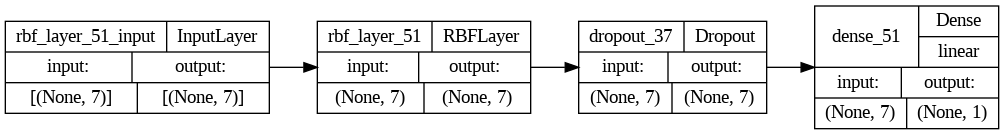

In [ ]:
#@title Imagen de la red del modelo
path_img_file = directory+"/image_redRBF.jpg"
tf.keras.utils.plot_model(loaded_modelRBF,
                          #to_file=path_img_file,
                          #dpi=96, # Determina el tamaño de la imagen y por ende, su calidad, por defecto en 96
                          rankdir='LR', # LR para horizontal. TR para vertical
                          #expand_nested=False,
                          #show_trainable=True,
                          show_shapes=True,
                          show_layer_names=True,
                          show_layer_activations=True
                          )

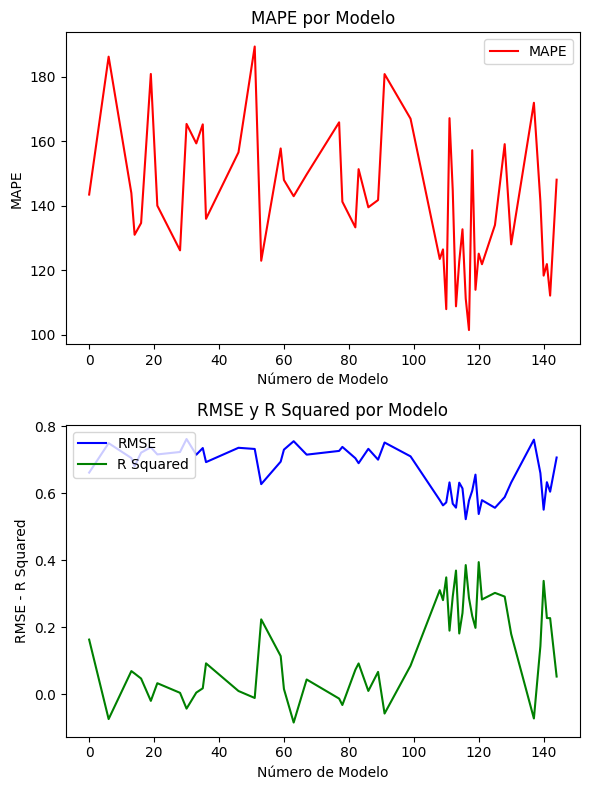

Modelo con el MAPE más bajo ->             value: 101.46086120605467 ;    model: modelo_0117
Modelo con el RMSE más bajo ->             value: 0.5225187540054321 ;    model: modelo_0116
Modelo con el R Squared más cercano a 1 -> value: 0.3944593966007232 ;    model: modelo_0120


In [ ]:
#@title Comparativa de métricas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos
df = pd.read_csv(directory+'/resultadosRBF_modelos_shanghai.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Primer gráfico para 'mape'
sns.lineplot(data=df, x='trial_id', y='mape', color='red', label='MAPE', ax=ax1)
ax1.set_title('MAPE por Modelo')
ax1.set_xlabel('Número de Modelo')
ax1.set_ylabel('MAPE')

# Segundo gráfico para 'rmse' y 'r_squared'
sns.lineplot(data=df, x='trial_id', y='rmse', color='blue', label='RMSE', ax=ax2)
sns.lineplot(data=df, x='trial_id', y='r_squared', color='green', label='R Squared', ax=ax2)
ax2.set_title('RMSE y R Squared por Modelo')
ax2.set_xlabel('Número de Modelo')
ax2.set_ylabel('RMSE - R Squared')
ax2.legend(loc='upper left')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Encontrar los modelos con los mejores valores
best_mape_model, mape_bestvalue = df.iloc[df['mape'].idxmin()]['model_name'], df.iloc[df['mape'].idxmin()]['mape']
best_rmse_model, rmse_bestvalue = df.iloc[df['rmse'].idxmin()]['model_name'], df.iloc[df['rmse'].idxmin()]['rmse']
best_rsquared_model, rsquared_bestvalue = df.iloc[(df['r_squared']-1).abs().idxmin()]['model_name'], df.iloc[(df['r_squared']-1).abs().idxmin()]['r_squared']

print(f"Modelo con el MAPE más bajo ->             value: {mape_bestvalue} ;    model: {best_mape_model}")
print(f"Modelo con el RMSE más bajo ->             value: {rmse_bestvalue} ;    model: {best_rmse_model}")
print(f"Modelo con el R Squared más cercano a 1 -> value: {rsquared_bestvalue} ;    model: {best_rsquared_model}")


In [ ]:
loss, mape, rmse_value, r_squared_value = loaded_modelRBF.evaluate(X_test, y_test)
print(f"""Loss
RMSE Loss: {loss}

Métricas del modelo
MAPE: {mape}
RMSE: {rmse_value}
R2:   {r_squared_value}
""")

Loss
RMSE Loss: 0.8222015062967937

Métricas del modelo
MAPE: 102.0877456665039
RMSE: 0.8222015500068665
R2:   -0.17646390199661255



## Pesos

In [ ]:
weights_RBFmodel = loaded_modelRBF.get_weights()
weights_RBFmodel

[array([[-0.03552485,  0.03249042,  0.02265198, -0.03191533, -0.00866722,
         -0.04986317, -0.04821415],
        [ 0.01005135, -0.02389982, -0.02040388,  0.01659352,  0.01113374,
         -0.04350591, -0.02163094],
        [-0.02927713,  0.00384022, -0.03069311,  0.04884473, -0.01802056,
         -0.00190045, -0.01714084],
        [-0.03713074,  0.01802374,  0.02070016,  0.02157946,  0.01759751,
         -0.03084426,  0.04755593],
        [ 0.02995107, -0.04119777,  0.04031327, -0.00261597,  0.01200527,
         -0.03169143, -0.02487986],
        [-0.03298901,  0.00344006, -0.04246713,  0.00959177, -0.02355631,
          0.01679171, -0.02854167],
        [-0.03596397, -0.02371771,  0.00796838,  0.02801922, -0.02043296,
          0.03658843,  0.00292655]], dtype=float32),
 array([[-0.01474142],
        [ 0.6677092 ],
        [-0.84659964],
        [ 0.39609283],
        [ 0.31170386],
        [ 0.32368523],
        [-0.51419675]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
centros_RBF = weights_RBFmodel[0] # Cada fila son los centros de una neurona diferente
weights_capaSalida_RBF = weights_RBFmodel[1]
bias_capaSalida_RBF = weights_RBFmodel[2]
print(f"Centros RBF:\n{centros_RBF}")
print(f"\nPesos capa de salida:\n{weights_capaSalida_RBF}")
print(f"\nBias capa de salida:\n{bias_capaSalida_RBF}")

Centros RBF:
[[-0.03552485  0.03249042  0.02265198 -0.03191533 -0.00866722 -0.04986317
  -0.04821415]
 [ 0.01005135 -0.02389982 -0.02040388  0.01659352  0.01113374 -0.04350591
  -0.02163094]
 [-0.02927713  0.00384022 -0.03069311  0.04884473 -0.01802056 -0.00190045
  -0.01714084]
 [-0.03713074  0.01802374  0.02070016  0.02157946  0.01759751 -0.03084426
   0.04755593]
 [ 0.02995107 -0.04119777  0.04031327 -0.00261597  0.01200527 -0.03169143
  -0.02487986]
 [-0.03298901  0.00344006 -0.04246713  0.00959177 -0.02355631  0.01679171
  -0.02854167]
 [-0.03596397 -0.02371771  0.00796838  0.02801922 -0.02043296  0.03658843
   0.00292655]]

Pesos capa de salida:
[[-0.01474142]
 [ 0.6677092 ]
 [-0.84659964]
 [ 0.39609283]
 [ 0.31170386]
 [ 0.32368523]
 [-0.51419675]]

Bias capa de salida:
[0.]


## Validación

In [ ]:
early_stopping = callbacks.EarlyStopping(
            # early stopping ayuda a que un modelo no se entrene demasiado y gaste recursos de más
            monitor='val_loss', # Se detiene dependiendo del valor de la función de pérdida del set de validación
            patience=5 # El entrenamiento se detiene en caso de que en 5 iteraciones el modelo no mejore
            )

historial_RBF = loaded_modelRBF.fit(X_train,
                                    y_train,
                                    validation_data=(X_train,y_train),
                                    epochs=100,
                                    callbacks = [early_stopping]
                                    )

Train on 240 samples, validate on 240 samples
Epoch 1/100
240/240 [==============================] - 0s 1ms/sample - loss: 0.7417 - mean_absolute_percentage_error: 173.1243 - rmse: 0.7417 - r_squared: -0.0421 - val_loss: 0.6834 - val_mean_absolute_percentage_error: 116.5503 - val_rmse: 0.6834 - val_r_squared: 0.1289
Epoch 2/100
240/240 [==============================] - 0s 246us/sample - loss: 0.6608 - mean_absolute_percentage_error: 114.9321 - rmse: 0.6608 - r_squared: 0.1964 - val_loss: 0.5742 - val_mean_absolute_percentage_error: 113.0793 - val_rmse: 0.5742 - val_r_squared: 0.3196
Epoch 3/100
240/240 [==============================] - 0s 222us/sample - loss: 0.6056 - mean_absolute_percentage_error: 135.1246 - rmse: 0.6056 - r_squared: 0.2610 - val_loss: 0.5611 - val_mean_absolute_percentage_error: 130.2865 - val_rmse: 0.5611 - val_r_squared: 0.3469
Epoch 4/100
240/240 [==============================] - 0s 205us/sample - loss: 0.5705 - mean_absolute_percentage_error: 119.0569 - rmse:

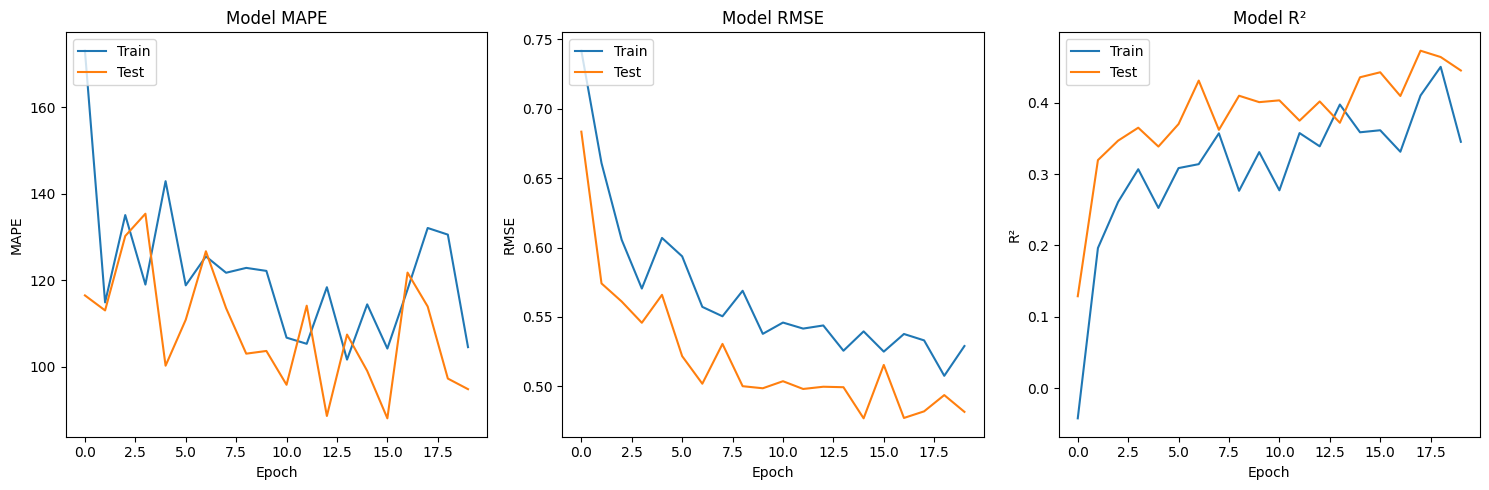

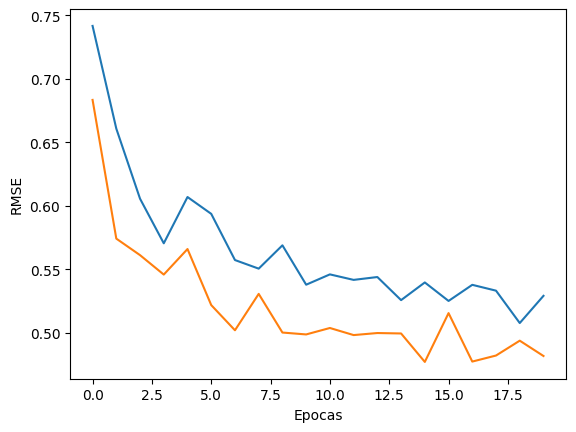

In [ ]:
#Evaluacion del modelo 1
loss, mape, rmse_value, r_squared_value = loaded_modelRBF.evaluate(X_test, y_test)

# Configurar el layout del subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas, tamaño total del plot

# Graficar MAPE
axs[0].plot(historial_RBF.history['mean_absolute_percentage_error'])
axs[0].plot(historial_RBF.history['val_mean_absolute_percentage_error'])
axs[0].set_title('Model MAPE')
axs[0].set_ylabel('MAPE')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Graficar RMSE
axs[1].plot(historial_RBF.history['rmse'])
axs[1].plot(historial_RBF.history['val_rmse'])
axs[1].set_title('Model RMSE')
axs[1].set_ylabel('RMSE')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Graficar R²
axs[2].plot(historial_RBF.history['r_squared'])
axs[2].plot(historial_RBF.history['val_r_squared'])
axs[2].set_title('Model R²')
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Epoch')
axs[2].legend(['Train', 'Test'], loc='upper left')

# Mostrar el plot
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
plt.xlabel("Epocas")
plt.ylabel("RMSE")
plt.plot(historial_RBF.history['loss'], label="loss")
plt.plot(historial_RBF.history['val_loss'], label="val_loss")
plt.show()

**Antes del Re-entrenamiento**

Loss

RMSE Loss: 0.8222015062967937

<br>

Métricas del modelo
- MAPE: 102.0877456665039
- RMSE: 0.8222015500068665
- R2:   -0.17646390199661255


In [ ]:
print(f"""\tDespués del Re-entrenamiento
Loss
RMSE Loss: {loss}

Métricas del modelo
MAPE: {mape}
RMSE: {rmse_value}
R2:   {r_squared_value}
""")

	Después del Re-entrenamiento
Loss
RMSE Loss: 0.511156698067983

Métricas del modelo
MAPE: 78.61915588378906
RMSE: 0.5111567378044128
R2:   0.4097841680049896



### Pesos luego del re-entrenamiento

In [ ]:
weights_RBFmodel_retrained = loaded_modelRBF.get_weights()
weights_RBFmodel_retrained

[array([[-0.80343765, -0.97509134, -0.05785339, -0.91355115, -1.0000433 ,
         -0.9709111 ,  0.21099783],
        [-0.16342777,  1.7522415 , -0.18545339,  1.882967  ,  1.094845  ,
          1.8335456 , -0.5703495 ],
        [-0.7239225 ,  0.572372  , -0.9216835 , -0.7531889 ,  1.7964041 ,
          0.68843573, -0.8568283 ],
        [-1.0051935 ,  0.6590412 ,  1.288967  , -0.5036102 , -0.64117706,
         -0.7149906 ,  0.19897039],
        [-1.3701504 ,  1.1471987 , -1.1478142 ,  0.6128605 ,  2.068094  ,
          1.496391  , -0.8069069 ],
        [-1.0446428 ,  0.517427  , -0.72731113,  1.853078  ,  2.9092376 ,
          1.4065233 , -1.0344177 ],
        [ 0.804717  ,  0.96828663, -0.13542557,  0.9221872 ,  1.0997578 ,
          0.98424196, -0.37404314]], dtype=float32),
 array([[-2.0129566],
        [ 1.9962188],
        [-4.1552773],
        [ 2.1941524],
        [ 3.5224056],
        [ 1.8851168],
        [-1.9098874]], dtype=float32),
 array([-0.03078628], dtype=float32)]

In [ ]:
centros_RBF_retrained = weights_RBFmodel_retrained[0] # Cada fila son los centros de una neurona diferente
weights_capaSalida_retrained = weights_RBFmodel_retrained[1]
bias_capaSalida_retrained = weights_RBFmodel_retrained[2]
print(f"Centros RBF:\n{centros_RBF_retrained}")
print(f"\nPesos capa de salida:\n{weights_capaSalida_retrained}")
print(f"\nBias capa de salida:\n{bias_capaSalida_retrained}")

Centros RBF:
[[-0.80343765 -0.97509134 -0.05785339 -0.91355115 -1.0000433  -0.9709111
   0.21099783]
 [-0.16342777  1.7522415  -0.18545339  1.882967    1.094845    1.8335456
  -0.5703495 ]
 [-0.7239225   0.572372   -0.9216835  -0.7531889   1.7964041   0.68843573
  -0.8568283 ]
 [-1.0051935   0.6590412   1.288967   -0.5036102  -0.64117706 -0.7149906
   0.19897039]
 [-1.3701504   1.1471987  -1.1478142   0.6128605   2.068094    1.496391
  -0.8069069 ]
 [-1.0446428   0.517427   -0.72731113  1.853078    2.9092376   1.4065233
  -1.0344177 ]
 [ 0.804717    0.96828663 -0.13542557  0.9221872   1.0997578   0.98424196
  -0.37404314]]

Pesos capa de salida:
[[-2.0129566]
 [ 1.9962188]
 [-4.1552773]
 [ 2.1941524]
 [ 3.5224056]
 [ 1.8851168]
 [-1.9098874]]

Bias capa de salida:
[-0.03078628]


In [ ]:
#@title Guardado de Re-entrenado
loaded_modelRBF.save(f'{directory}/{best_model_name}-retrained.h5') # GUARDAR modelo

print(f'\nCompile config:\n{loaded_modelRBF.get_config()}\n')
loaded_modelRBF.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 7), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'rbf_layer_51_input'}, 'registered_name': None}, {'module': None, 'class_name': 'RBFLayer', 'config': {'name': 'rbf_layer_51', 'trainable': True, 'batch_input_shape': (None, 7), 'dtype': 'float32', 'units': 7, 'gamma': 0.6000000238418579}, 'registered_name': 'RBFLayer', 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_37', 'trainable': True, 'dtype': 'float32', 'rate': 0.25, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 7)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_51', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers

# Comparativa


| Column 1 | LinearRegressor | MLP | MLP Re-trained | RBF | RBF Re-trained |
|----------|----------|------------|------------|------------|-----------|
| MAPE     |  60.6147  |  182.4216  |  64.2194  |  102.0877  |  78.6192  |
| RMSE     |   0.3464  |    0.9633  |   0.2398  |    0.8222  |   0.5112  |
| R2       |   0.8701  |   -0.8345  |   0.8355  |   -0.1765  |   0.4098  |
